Список заданий:

- Реализовать программу по скачиванию изображения с сети и его отображению
- Реализовать программу по отрисовке функции $y=|\sin{(x)}^3|$
- Реализовать программу по отрисовке функций $y=x^2$  и $y=x^3$ в двух окнах (в одной строке, два столбца). Подсказка: использовать `subfigure.`
- Реализовать программу по генерации данных распределенных по нормальному закону $N(\mu, \sigma)$. Параметры распределение можно выбрать самостоятельно. Нарисовать полученные данные в виде 2D графика.
- Создать программу по перемножению двух матриц (на низком уровне - использовать циклы).
- Дан вектор $m = [1, 2]^T$. Вам необходимо создать график с ситемой координат ($XY$) и вектором $m$ на нем (красным цветом). Даны две матрицы $R=[0, -1; 1, 0]$ и  $R_2 =[1, 0.5; 0, 1]$, нарисуйте результат перемножения матриц на вектор $m$ (разными цветами). **Примечание**: точка с запятой  в записи матрицы означает переход на новую строку.

# Import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Task 1

In [2]:
!mkdir -p img
!wget "https://4pawsins.com/wp-content/uploads/2018/10/corgi_1200.jpg" -O img/corgi.jpg

--2020-12-28 20:54:01--  https://4pawsins.com/wp-content/uploads/2018/10/corgi_1200.jpg
Resolving 4pawsins.com (4pawsins.com)... 67.227.187.15
Connecting to 4pawsins.com (4pawsins.com)|67.227.187.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608076 (594K) [image/jpeg]
Saving to: ‘img/corgi.jpg’

img/corgi.jpg       100%[===================>] 593.82K  --.-KB/s    in 0.07s   

2020-12-28 20:54:01 (8.28 MB/s) - ‘img/corgi.jpg’ saved [608076/608076]



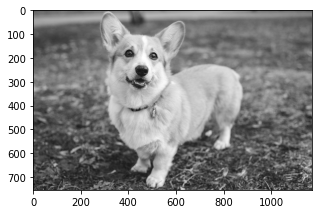

In [3]:
img = cv2.imread('img/corgi.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.show()

#Task 2

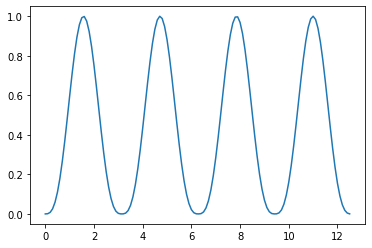

In [4]:
x = np.arange(0, 4*np.pi, 0.1)
y = abs(np.sin(x)**3)

plt.plot(x, y)
plt.show()

#Task 3

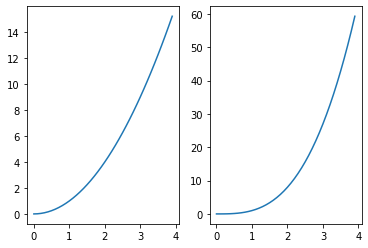

In [5]:
x = np.arange(0, 4, 0.1)
x_2 = x * x
x_3 = x * x_2

fig, (plt_1, plt_2) = plt.subplots(1, 2)
plt_1.plot(x, x_2)
plt_2.plot(x, x_3)
plt.show()

#Task 4

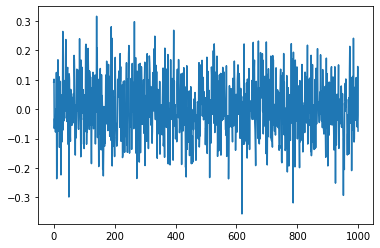

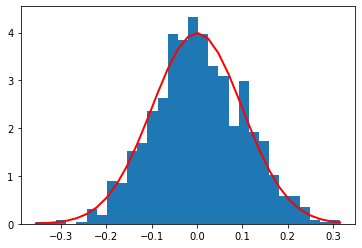

In [6]:
mu, sigma = 0, 0.1 # mean and std deviation
s = np.random.normal(mu, sigma, 1000)

plt.plot(s)
plt.show()

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(
    bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)),
    linewidth=2, color='r'
)

plt.show()

#Task 5

In [7]:
def matrix_multiplication(a, b):
    b_zip = list(zip(*b))
    return [[sum(a_elem * b_elem for a_elem, b_elem in zip(a_row, b_col))
             for b_col in b_zip] for a_row in a]

x = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
y = [[1, 2], [1, 2], [3, 4]]

print(matrix_multiplication(x, y))
print(np.matrix(x) * np.matrix(y))

[[12, 18], [27, 42], [42, 66], [57, 90]]
[[12 18]
 [27 42]
 [42 66]
 [57 90]]


# Task 6

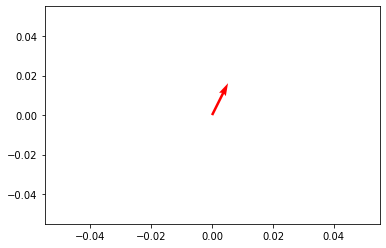

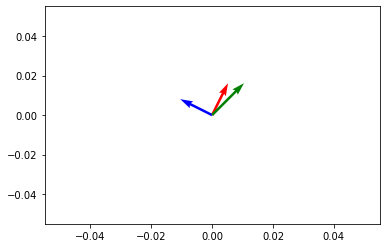

In [8]:
O = [0, 0]
M = [1, 2]

plt.quiver(*O, M[0], M[1], color=['r', 'b', 'g'], scale=21)
plt.show()

R1 = [[0, -1], [1, 0]]
R2 = [[1, 0.5], [0, 1]]

m = np.array(M).reshape((2, 1))
rm = []
o = [O]
for i in [matrix_multiplication(R1, m), matrix_multiplication(R2, m)]:
  rm.append([*i[0], *i[1]])
  o.append(O)

rm.insert(0, M)
rm = np.array(rm)
o = np.array(o).reshape(2, 3)

plt.quiver(*o, rm[:, 0], rm[:, 1], color=['r', 'b', 'g'], scale=21)
plt.show()